In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..\\..'))
	print(os.getcwd())
except:
	pass


 # Analyzing Employ Exit Survey
 We are working with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education(TAFE) institute in Queensland, Australia.

 Figure out if employees who only worked for the institute for a short period of time are resigning due to some kind of dissatisfaction and  also for the employees who have been there longer.

 Figure out if younger employees are resigning due to some kind of dissatisfaction and also for the older employees.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# read in dataframe
dete_survey = pd.read_csv(
    "Projects\\Project6_Clean_Analyze_Employ_Exit_Survey\\dete_survey.csv"
)
# read in dataframe
tafe_survey = pd.read_csv(
    "Projects\\Project6_Clean_Analyze_Employ_Exit_Survey\\tafe_survey.csv"
)


In [2]:
# print info about dete survey
print(dete_survey.info(), "\n")
dete_survey.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
# print info about tafe survey
print(tafe_survey.info(), "\n")
tafe_survey.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


 # Observations
 * The dete_survey dataframe contains 'not stated' values that indicate values that are missing and not represented as NaN
 * dete_survey and tafe_survey contain many columns that we don't need to complete our analysis
 * Each dataframe contains many of the same columns, but the names are different
 * There are multiple columns/answers that indicate an employee resigned because they were dissatisfied

 # Identify Missing Values
 Correct the 'Not Stated' values and drop columns that are not needed

In [4]:
# read the data without 'Not Stated' values as 'NaN'
dete_survey = pd.read_csv(
    "Projects\\Project6_Clean_Analyze_Employ_Exit_Survey\\dete_survey.csv",
    na_values="Not Stated",
)
dete_survey.head()


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
# update and remove columns that are not needed
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

# verify the updated columns
print(dete_survey_updated.columns, "\n")
print(tafe_survey_updated.columns)


Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object') 

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fa

 # Rename Columns
 Standardize columns so that we can eventually combine dataframes
 clean up column names

In [6]:
dete_survey_updated.columns = (
    dete_survey_updated.columns.str.lower().str.strip().str.replace("\s+", "_")
)
dete_survey_updated.columns


Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [7]:
# match the common columns of tafe_survey to the dete_survey_updated
mapping = {
    "Record ID": "id",
    "CESSATION YEAR": "cease_date",
    "Reason for ceasing employment": "separationtype",
    "Gender. What is your Gender?": "gender",
    "CurrentAge. Current Age": "age",
    "Employment Type. Employment Type": "employment_status",
    "Classification. Classification": "position",
    "LengthofServiceOverall. Overall Length of Service at Institute (in years)": "institute_service",
    "LengthofServiceCurrent. Length of Service at current workplace (in years)": "role_service",
}
# rename the tafe_survey columns according to the mapping
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis=1)

tafe_survey_updated.columns


Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

 We have renamed the dete_survey columns to standardize them and matched the tafe_survey columns that held common data to dete_survey columns.

 # Filter the Data
 Filter the data so that we can analyze only the survey respondents that resigned

In [8]:
# Check unique values for the 'separationtype' columns
tafe_survey_updated["separationtype"].value_counts()


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [9]:
# Check unique values for the 'separationtype' columns
dete_survey_updated["separationtype"].value_counts()


Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [10]:
# update the columns in dete_survey_updated so that all reasons for resignation is assigned only as 'resignation'
dete_survey_updated["separationtype"] = (
    dete_survey_updated["separationtype"].str.split("-").str[0]
)

dete_survey_updated["separationtype"].value_counts()


Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [11]:
# Select only the resignation separation types from each dataframe
# use df.copy() incase to avoid the SettingWithCopy Warning
dete_resignations = dete_survey_updated[
    dete_survey_updated["separationtype"] == "Resignation"
].copy()
tafe_resignations = tafe_survey_updated[
    tafe_survey_updated["separationtype"] == "Resignation"
].copy()


 # Verify The Data
 clean and explore the data columns to make sure all the dates make sense
 * *cease_date* should come after the *start_date*
 * it is unlikely that the *start_date* was before the year 1940 since most people start working in their 20s

In [12]:
# check unique values in cease_date column within the filtered dataframe
dete_resignations["cease_date"].value_counts()


2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
07/2012      1
2010         1
09/2010      1
Name: cease_date, dtype: int64

In [13]:
# extract only the years and convert it to float
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str[-1]
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype("float")
dete_resignations["cease_date"].value_counts().sort_index()


2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [14]:
tafe_resignations["cease_date"].value_counts().sort_index()


2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

In [15]:
# check for outliers
dete_resignations["dete_start_date"].value_counts().sort_values()


1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

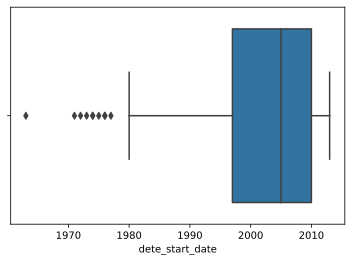

In [16]:
# create a boxplot of the dete_start_date_column
sns.boxplot(dete_resignations["dete_start_date"])


 The years don't completely align in both dataframes
 dete_survey has no resignations in 2011 while the tafe_survey has the most resignations in 2011. There are also couple more years that the dataframes don't have the matching years.

 # Creating a New Column
 Create a column containing hte length of time an employee spent in their worksplace, or years or service, in both dataframes
 * End goal: Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?
 * End goal: Are young employees resigning due to some kind of dissatisfaction? What about employees who are older?

In [17]:
# Calculate the length of time an employee spent in their respective workplace and create a new column
dete_resignations["institute_service"] = (
    dete_resignations["cease_date"] - dete_resignations["dete_start_date"]
)

dete_resignations["institute_service"].head()


3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

 # Identify Dissatisfied Employees
 Columns we will use to categorized dissatisfied employees:

 1. tafe_survey_updated:
   * contributing factors. dissatisfaction
   * contributing factors. job dissatisfaction

 2. dafe_survey_updated:
   * job_dissatisfaction
   * dissatisfaction_with_the_department
   * physical_work_environment
   * lack_of_recognition
   * lack_of_job_security
   * work_location
   * employment_conditions
   * work_life_balance
   * workload

 If the employee indicates any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. The dissatisfied column will contain following values:
 * True: Resigned due to dissatisfaction in some way
 * False: Resigned because of reason other than dissatisfaction
 * NaN

In [18]:
# check unique values
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [19]:
# check unique values

# Check the unique values
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()


-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [20]:
# check unique values of multiple columns
dissatisfied_columns = [
    "job_dissatisfaction",
    "dissatisfaction_with_the_department",
    "physical_work_environment",
    "lack_of_recognition",
    "lack_of_job_security",
    "work_location",
    "employment_conditions",
    "work_life_balance",
    "workload",
]
dete_resignations[dissatisfied_columns].apply(pd.Series.value_counts)


,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
False,270,282,305,278,297,293,288,243,284
True,41,29,6,33,14,18,23,68,27


In [21]:
# update values in contributing factors columns to be True, False, or NaN
def update_vals(x):
    if x == "-":
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True


tafe_resignations["dissatisfied"] = (
    tafe_resignations[
        [
            "Contributing Factors. Dissatisfaction",
            "Contributing Factors. Job Dissatisfaction",
        ]
    ]
    .applymap(update_vals)
    .any(1, skipna=False)
)

tafe_resignations_up = tafe_resignations.copy()

# check unique values after the updates
tafe_resignations_up["dissatisfied"].value_counts(dropna=False)


False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [22]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN by uaing any() function
dete_resignations["dissatisfied"] = dete_resignations[
    [
        "job_dissatisfaction",
        "dissatisfaction_with_the_department",
        "physical_work_environment",
        "lack_of_recognition",
        "lack_of_job_security",
        "work_location",
        "employment_conditions",
        "work_life_balance",
        "workload",
    ]
].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up["dissatisfied"].value_counts(dropna=False)


False    162
True     149
Name: dissatisfied, dtype: int64

 # Combining the Data
 Add an institute column so that we can differentiate the data from each survey after we combine them. Then, combine the dataframes and drop any remaining columns we don't need

In [23]:
# Add an institute column
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"


In [24]:
# combine the dataframes
combined = pd.concat(
    [dete_resignations_up, tafe_resignations_up], ignore_index=True, sort=True
)
combined.head()


,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,...,role_service,role_start_date,separationtype,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2006.0,Resignation,NaN,False,NaN,False,False,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1997.0,Resignation,NaN,False,NaN,False,False,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation,NaN,False,NaN,False,False,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2008.0,Resignation,NaN,False,NaN,False,False,False,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation,NaN,False,NaN,False,False,False,False


In [25]:
# verify the number of not null values in each column
combined.notnull().sum().sort_values()


torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [26]:
# drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh=500, axis=1).copy()
combined_updated.notnull().sum().sort_values()


institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
institute            651
separationtype       651
dtype: int64

 # Clean the Service Column
 Clean the institute_service column and categorize employees according to the following definitions

 * New : Less than 3 years in the workplace
 * Experienced: 3-6 years in the workplace
 * Established: 7-10 years in the workplace
 * Veteran: 11 or more years in the workplace

In [27]:
# check unique values
combined_updated["institute_service"].value_counts(dropna=False)


NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
14.0                   6
12.0                   6
17.0                   6
22.0                   6
10.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


In [28]:
# Extract(one or more digits) the years of service and Save it to a new column
combined_updated["institute_service_up"] = (
    combined_updated["institute_service"].astype("str").str.extract(r"(\d+)")
)
# convert the type to float
combined_updated["institute_service_up"] = combined_updated[
    "institute_service_up"
].astype("float")
# Check the years extracted are correct
combined_updated["institute_service_up"].value_counts().sort_index()


0.0      20
1.0     159
2.0      14
3.0      83
4.0      16
5.0      56
6.0      17
7.0      34
8.0       8
9.0      14
10.0      6
11.0     30
12.0      6
13.0      8
14.0      6
15.0      7
16.0      5
17.0      6
18.0      5
19.0      3
20.0     17
21.0      3
22.0      6
23.0      4
24.0      4
25.0      2
26.0      2
27.0      1
28.0      2
29.0      1
30.0      2
31.0      1
32.0      3
33.0      1
34.0      1
35.0      1
36.0      2
38.0      1
39.0      3
41.0      1
42.0      1
49.0      1
Name: institute_service_up, dtype: int64

In [29]:
# function to convert years of service to categories
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"


# create a new column to save the categories that has been returned by applying the transform_service function to the 'institute_service_up' column
combined_updated["service_cat"] = combined_updated["institute_service_up"].apply(
    transform_service
)

combined_updated["service_cat"].value_counts()


New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

 # Analysis Of Dissatisfaction Based On Years of Service

In [30]:
# unique values
combined_updated["dissatisfied"].value_counts(dropna=False)


False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [31]:
# replace missing values in dissatisfied column with the most frequent value(False)
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)
combined_updated["dissatisfied"].value_counts(dropna=False)


False    411
True     240
Name: dissatisfied, dtype: int64

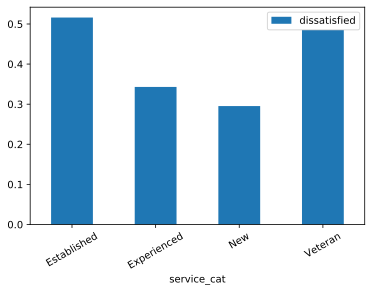

In [32]:
# calculate percentage of employees who resigned due to dissatisfaction in each category
dis_pct = combined_updated.pivot_table(index="service_cat", values="dissatisfied")

# Plot the results
dis_pct.plot(kind="bar", rot=30)


 From the graph, employees with 7 or more years(Established & Veteran) of service are more likely to resign due to some kind of dissatisfaction

In [33]:
combined_updated["institute_service_up"].isnull().sum()
# drop the missing rows
combined_updated.dropna()


,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype,institute_service_up,service_cat
0,36-40,2012.0,False,Permanent Full-time,Female,4.000000e+00,DETE,7,Teacher,Resignation,7.0,Established
1,41-45,2012.0,True,Permanent Full-time,Female,6.000000e+00,DETE,18,Guidance Officer,Resignation,18.0,Veteran
2,31-35,2012.0,False,Permanent Full-time,Female,9.000000e+00,DETE,3,Teacher,Resignation,3.0,Experienced
3,46-50,2012.0,True,Permanent Part-time,Female,1.000000e+01,DETE,15,Teacher Aide,Resignation,15.0,Veteran
4,31-35,2012.0,False,Permanent Full-time,Male,1.200000e+01,DETE,3,Teacher,Resignation,3.0,Experienced
5,36-40,2012.0,False,Permanent Full-time,Female,1.300000e+01,DETE,14,Teacher,Resignation,14.0,Veteran
6,31-35,2012.0,True,Permanent Full-time,Male,1.500000e+01,DETE,5,Teacher,Resignation,5.0,Experienced
8,56-60,2012.0,False,Permanent Full-time,Male,2.100000e+01,DETE,30,Teacher,Resignation,30.0,Veteran
9,51-55,2012.0,False,Permanent Part-time,Female,2.200000e+01,DETE,32,Cleaner,Resignation,32.0,Veteran
10,46-50,2012.0,True,Permanent Part-time,Female,2.300000e+01,DETE,15,School Administrative Staff,Resignation,15.0,Veteran


 # Analysis Of Dissatisfaction Based On Age

In [34]:
# Clean the Age Column
combined_updated["age"] = combined_updated["age"].astype("str").str.extract(r"(\d+)")

# convert the age column to float
combined_updated['age'] = combined_updated['age'].astype('float')

# check unique values
combined_updated['age'].value_counts()


41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

In [35]:
# function to convert age to categories
def transform_age(val):
       if val >= 50:
              return "Old"
       elif 40 <= val <= 50:
              return "Middle Aged"
       elif pd.isnull(val):
              return np.nan
       else:
              return "Young"

# Create a new column to save the age categories
combined_updated['age_cat'] = combined_updated['age'].apply(transform_age)

combined_updated['age_cat'].value_counts()       


Young          273
Middle Aged    174
Old            149
Name: age_cat, dtype: int64

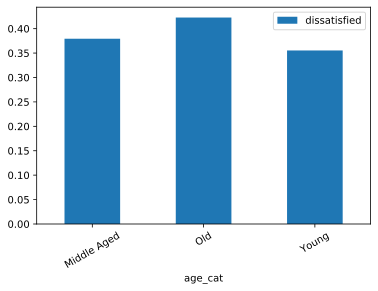

In [36]:
dis_age = combined_updated.pivot_table(
    index="age_cat", values="dissatisfied"
)

# Plot the results
dis_age.plot(kind="bar", rot=30)


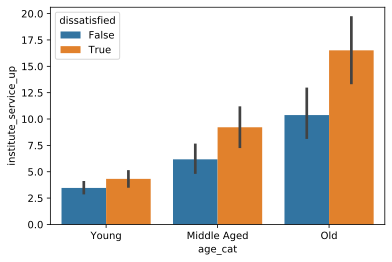

In [37]:
ax = sns.barplot(x='age_cat', y='institute_service_up', hue='dissatisfied', data=combined_updated)


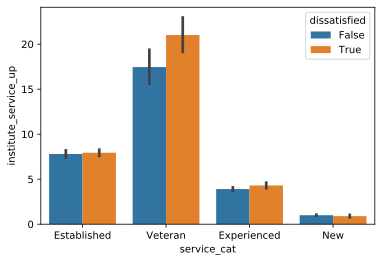

In [38]:
ax = sns.barplot(x='service_cat', y='institute_service_up', hue='dissatisfied', data=combined_updated)


In [39]:
# Calculate each gender within the each age category
young_fem = combined_updated[(combined_updated['age_cat'] == 'Young') & (combined_updated['gender'] == 'Female') & (combined_updated['dissatisfied'] == True)]
young_male = combined_updated[(combined_updated['age_cat'] == 'Young') & (combined_updated['gender'] == 'Male') & (combined_updated['dissatisfied'] == True)]

middle_fem = combined_updated[(combined_updated['age_cat'] == 'Middle Aged') & (combined_updated['gender'] == 'Female') & (combined_updated['dissatisfied'] == True)]
middle_male = combined_updated[(combined_updated['age_cat'] == 'Middle Aged') & (combined_updated['gender'] == 'Male') & (combined_updated['dissatisfied'] == True)]

old_fem = combined_updated[(combined_updated['age_cat'] == 'Old') & (combined_updated['gender'] == 'Female') & (combined_updated['dissatisfied'] == True)]
old_male = combined_updated[(combined_updated['age_cat'] == 'Old') & (combined_updated['gender'] == 'Male') & (combined_updated['dissatisfied'] == True)]

print(young_fem.shape[0], 'dissatisfied young females')
print(young_male.shape[0], 'dissatisfied young males')
print()
print(middle_fem.shape[0], 'dissatisfied middle aged females')
print(middle_male.shape[0], 'dissatisfied middle aged males')
print()
print(old_fem.shape[0], 'dissatisfied old females')
print(old_male.shape[0], 'dissatisfied old males')


71 dissatisfied young females
26 dissatisfied young males

51 dissatisfied middle aged females
15 dissatisfied middle aged males

35 dissatisfied old females
26 dissatisfied old males


 From the above bar plot, it shows that age group between 20-40 is the most dissatisfied
 Among the different age groups, it seems like females are more dissatisfied compared to man

 Perform Data Analysis With FacetGrid

C:\Users\kkang\Miniconda3\envs\dataquest\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


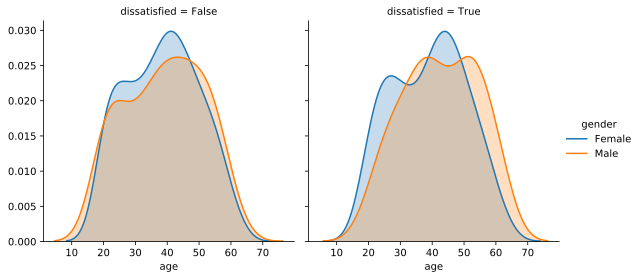

In [40]:
g = sns.FacetGrid(
    combined_updated,
    col="dissatisfied",
    hue="gender",
    legend_out=True,
    size = 4
)
g.map(sns.kdeplot, "age", shade=True).add_legend()


C:\Users\kkang\Miniconda3\envs\dataquest\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


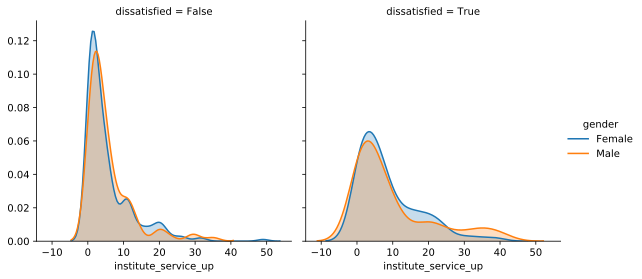

In [41]:
g = sns.FacetGrid(
    combined_updated,
    col="dissatisfied",
    hue="gender",
    legend_out=True,
    size = 4
)
g.map(sns.kdeplot, "institute_service_up", shade=True).add_legend()


C:\Users\kkang\Miniconda3\envs\dataquest\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


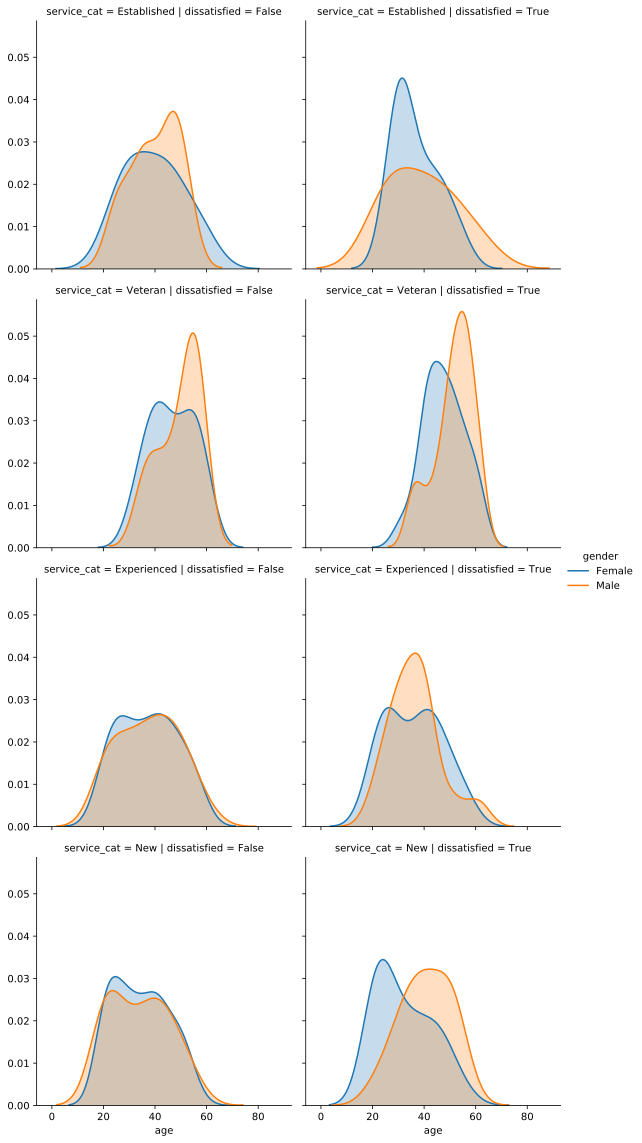

In [42]:
g = sns.FacetGrid(
    combined_updated,
    col="dissatisfied",
    row='service_cat',
    hue="gender",
    legend_out=True,
    size = 4
)
g.map(sns.kdeplot, "age", shade=True).add_legend()


 # Conclusion
 From the analysis, we can make a conclusion that veteran and established employees are more likely to resign due to dissatisfaction.
 Also, older employees with more experience are more likely to be dissatisfied compared to younger employees.
 Females seem to be more likely to resign due to dissatisfaction compared to males. Among the females, younger females are more likely to resign due to dissatisfaction.
 As employees gain experience, it might be likely that they are having dissatisfaction due to lack of promotions.